In [ ]:
%run main.py --gpu 0 1 2 3 --loss R1 --yaml_path params2.yml --result_dir result2 --data_path /root/work/Datasets/FFHQ

DataParallel(
  (module): Generator(
    (mapping_network): Sequential(
      (0): PixelNorm()
      (1): EqualLinear()
      (2): LeakyReLU(negative_slope=0.2)
      (3): EqualLinear()
      (4): LeakyReLU(negative_slope=0.2)
      (5): EqualLinear()
      (6): LeakyReLU(negative_slope=0.2)
      (7): EqualLinear()
      (8): LeakyReLU(negative_slope=0.2)
      (9): EqualLinear()
      (10): LeakyReLU(negative_slope=0.2)
      (11): EqualLinear()
      (12): LeakyReLU(negative_slope=0.2)
      (13): EqualLinear()
      (14): LeakyReLU(negative_slope=0.2)
      (15): EqualLinear()
      (16): LeakyReLU(negative_slope=0.2)
    )
    (style_generator): StyleGenerator(
      (const): ConstantInput()
      (main_net): ModuleList(
        (0): GBlock(
          (make_noise1): NoiseInjection()
          (adain1): AdaptiveInstanceNorm(
            (norm): InstanceNorm2d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
            (style): EqualLinear(
              (line

/root/work/mprg_lectures/StyleGAN/main.py:57: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  training_params = yaml.load(f)


Training epoch: 1 [0/70000 (0%)] | D loss : 1202.448120 | G loss: -0.424968 | Alpha: 0.000000|
Training epoch: 1 [51200/70000 (73%)] | D loss : 102.730087 | G loss: 7.400622 | Alpha: 0.364964|
Now we will save network parameters and generating image.
Training epoch: 2 [0/70000 (0%)] | D loss : 65.406181 | G loss: -3.971133 | Alpha: 0.500000|
Training epoch: 2 [51200/70000 (73%)] | D loss : 62.429340 | G loss: 0.023497 | Alpha: 0.864964|
Now we will save network parameters and generating image.
Training epoch: 3 [0/70000 (0%)] | D loss : 41.368664 | G loss: 2.491497 | Alpha: 1.000000|
Training epoch: 3 [51200/70000 (73%)] | D loss : 40.892616 | G loss: -1.072427 | Alpha: 1.000000|
Now we will save network parameters and generating image.
Training epoch: 4 [0/70000 (0%)] | D loss : 34.599857 | G loss: 0.258696 | Alpha: 1.000000|
Training epoch: 4 [51200/70000 (73%)] | D loss : 34.155205 | G loss: 0.690021 | Alpha: 1.000000|
Now we will save network parameters and generating image.
======

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2457: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


Training epoch: 1 [0/70000 (0%)] | D loss : 11.540272 | G loss: 1.579183 | Alpha: 0.000000|
Training epoch: 1 [25600/70000 (36%)] | D loss : 9.341299 | G loss: 0.671426 | Alpha: 0.182482|
Training epoch: 1 [51200/70000 (73%)] | D loss : 8.344632 | G loss: 0.244438 | Alpha: 0.364964|
Now we will save network parameters and generating image.
Training epoch: 2 [0/70000 (0%)] | D loss : 7.549230 | G loss: 0.241482 | Alpha: 0.500000|
Training epoch: 2 [25600/70000 (36%)] | D loss : 7.298309 | G loss: -0.083735 | Alpha: 0.682482|
Training epoch: 2 [51200/70000 (73%)] | D loss : 7.187712 | G loss: 0.353313 | Alpha: 0.864964|
Now we will save network parameters and generating image.
Training epoch: 3 [0/70000 (0%)] | D loss : 6.847834 | G loss: 0.341713 | Alpha: 1.000000|
Training epoch: 3 [25600/70000 (36%)] | D loss : 6.827140 | G loss: 0.382920 | Alpha: 1.000000|
Training epoch: 3 [51200/70000 (73%)] | D loss : 6.674169 | G loss: 0.165872 | Alpha: 1.000000|
Now we will save network paramete

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2539: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


In [10]:
import os
import shutil

path = '/root/work/Datasets/FFHQ'
dir_list = os.listdir(path)
for dir_ in dir_list:
    dir_path = os.path.join(path, dir_)
    img_list = os.listdir(dir_path)
    for item in img_list:
        if item in '.ipynb_checkpoints':
            item_path = os.path.join(path, dir_, item)
            print(item_path)

/root/work/Datasets/FFHQ/37000/.ipynb_checkpoints
/root/work/Datasets/FFHQ/00000/.ipynb_checkpoints


In [11]:
!rm -r /root/work/Datasets/FFHQ/37000/.ipynb_checkpoints
!rm -r /root/work/Datasets/FFHQ/00000/.ipynb_checkpoints

In [12]:
n_data = 30_000
n_batch = 128
n_epoch = 8
#fade_point = int((fade_in_percentage[current_depth] / 100)
#                                 * epochs[current_depth] * total_batches)
ticker = 0
total_batch = (n_data//n_batch)
fade_point = 0.5 * 8 * total_batch
for i in range(1000):
    alpha = ticker / fade_point
    ticker += 1
    if alpha >= 1:    break
print(alpha, i)
print(total_batch)
print(n_epoch*total_batch)

1.0 936
234
1872


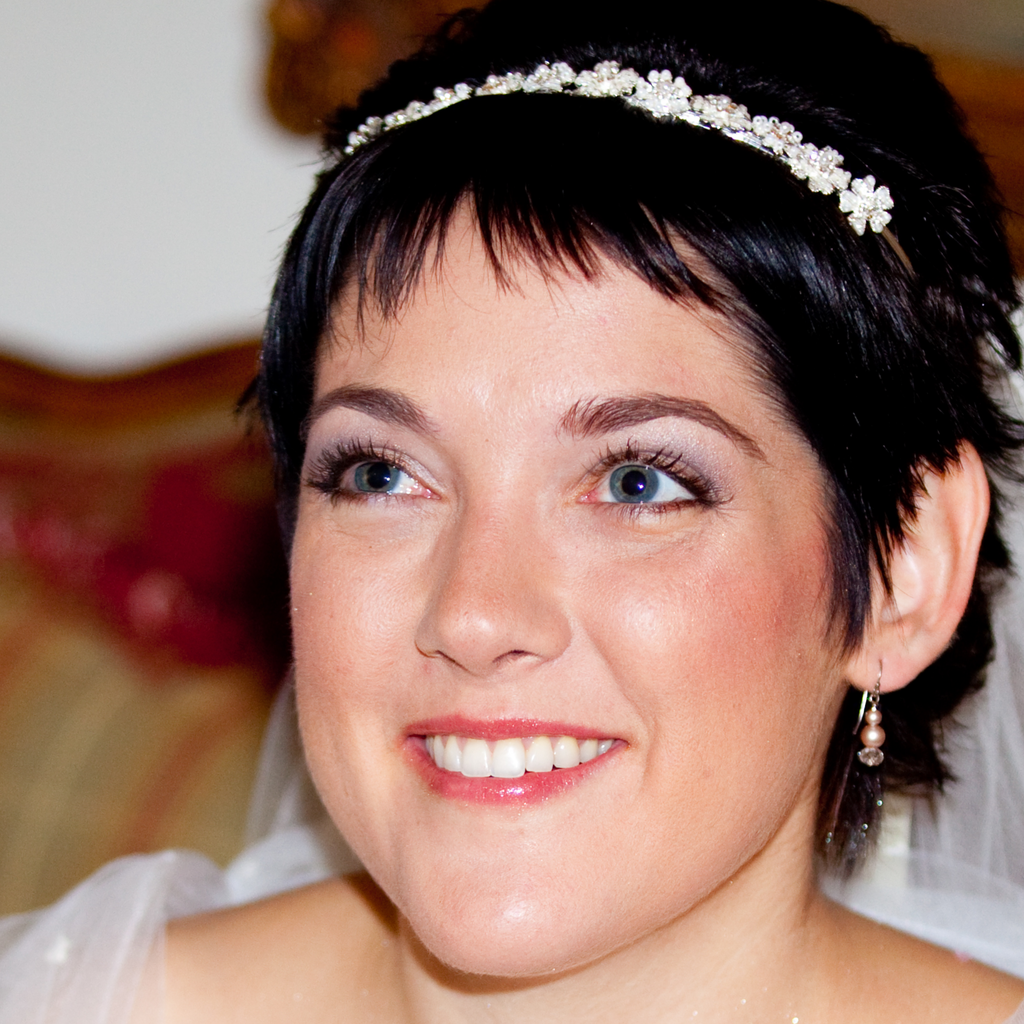

In [4]:
import os
import random
from PIL import Image

ffhq_path = '/root/work/Datasets/FFHQ/'
ffhq_item_list = sorted(os.listdir(ffhq_path))[1:]
Ims_pathes = []
for dir_name in ffhq_item_list:
    img_names = os.listdir(os.path.join(ffhq_path, dir_name))

    for img_name in img_names:
        if img_name == '.DS_Store': print(img_name)#os.remove(os.path.join(ffhq_path, dir_name, img_name))
        Ims_pathes.append(os.path.join(ffhq_path, dir_name, img_name))

        
random.shuffle(Ims_pathes)    
Image.open(Ims_pathes[1])